In [23]:
import argparse
import datetime
import matplotlib
from src.animate_scatter import AnimateScatter
from src.whale_optimization import WhaleOptimization
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def eggholder(X, Y):
    y = Y + 47.0
    a = (-1.0) * (y) * np.sin(np.sqrt(np.absolute((X / 2.0) + y)))
    b = (-1.0) * X * np.sin(np.sqrt(np.absolute(X - y)))
    return a + b


def booth(X, Y):
    return ((X) + (2.0 * Y) - 7.0) ** 2 + ((2.0 * X) + (Y) - 5.0) ** 2


def matyas(X, Y):
    return (0.26 * (X ** 2 + Y ** 2)) - (0.48 * X * Y)


def levi(X, Y):
    A = np.sin(3.0 * np.pi * X) ** 2
    B = ((X - 1) ** 2) * (1 + np.sin(3.0 * np.pi * Y) ** 2)
    C = ((Y - 1) ** 2) * (1 + np.sin(2.0 * np.pi * Y) ** 2)
    return A + B + C


In [25]:
def plot_graph(opt_alg) : 
    
    best_fitness = []
    for sol in opt_alg.best_solutions:
        best_fitness.append(sol[0])

    plt.plot([(i + 1) for i in range(len(best_fitness))], best_fitness, c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.show()
    print("\n\n")

In [26]:
def main():

    nsols = 50
    ngens = 30

    start_time = datetime.datetime.now()

    test_functions = {
        'eggholder': eggholder,
        'booth': booth,
        'matyas': matyas,
        'levi': levi
    }

    function_constraints = {
        'eggholder': 512.0,
        'booth': 10.0,
        'matyas': 10.0,
        'levi': 10.0
    }
    
    
    fnc = input("Enter function (booth, matyas, levi, eggholder): ")
    func = test_functions[fnc]
    

    C = function_constraints[fnc]

    algorithm_mode = input("Enter mode (original, optimised): ")
    constraints = [[-C, C], [-C, C]]

    opt_func = func

    b = 0.5
    a = 2.0
    a_step = a / ngens
    
    r = 0.25
    t = 0.1
    
    maximize = False
    opt_alg = WhaleOptimization(opt_func, constraints, algorithm_mode, nsols, b, a, a_step, maximize)
    solutions = opt_alg.get_solutions()
#     colors = [[1.0, 1.0, 1.0] for _ in range(nsols)]

#     a_scatter = AnimateScatter(constraints[0][0],
#                                constraints[0][1],
#                                constraints[1][0],
#                                constraints[1][1],
#                                solutions, colors, opt_func, r, t)

    for _ in range(ngens):
        opt_alg.optimize()
        solutions = opt_alg.get_solutions()
#         a_scatter.update(solutions)

    opt_alg.print_best_solutions()
    opt_alg.print_all_members()
    print("RunTime: " + str(datetime.datetime.now() - start_time))
    plot_graph(opt_alg)

Enter function (booth, matyas, levi, eggholder): matyas
Enter mode (original, optimised): optimised
generation best solution history
([fitness], [solution])
(0.10707865485322365, array([-1.57863306, -1.66502118]))
(0.10707865485322365, array([-1.57863306, -1.66502118]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.01609286771195448, array([-0.63180511, -0.52985972]))
(0.014832936257334978, array([-0.59960161, -0.61565568]))
(0.014832936257334978, array([-0.59960161, -0.61565568]))
(0.014485934925808935, array([-0.56403835, -0.6136729 ]))
(0.014485934925808935, array([-0.56403835, -0.6136729 ]))
(0.0005818912890913396, array([-0.0555181 , -0.09346226]))
(0.0005818912890913396, array([-0.05551

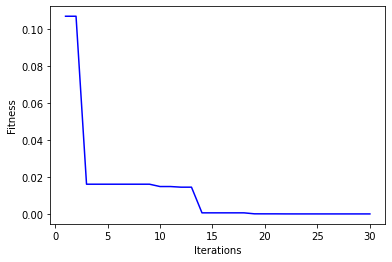

In [30]:
if __name__ == '__main__':
    main()
